# Smoothing

Here I will explore how smoothing is implemented in PySINDy. Note that relevant information can be found in `pysindy/pysindy/differentiation/smoothed_finite_difference.py`

Another useful place to look for explanation and more details is `pysindy/examples/5_differentiation/example.ipynb`

First we just import the necessary packages and generate synthetic data of the example

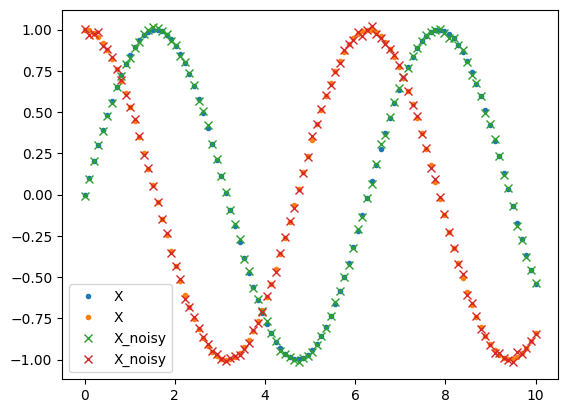

In [1]:
import numpy as np
from pysindy.differentiation import SmoothedFiniteDifference, FiniteDifference
import matplotlib.pyplot as plt
t = np.linspace(0, 10, 100)
X = np.vstack([np.sin(t), np.cos(t)]).T
noise = np.random.normal(0, 0.01, X.shape)
X_noisy = X + noise

plt.plot(t, X, '.', label='X')
plt.plot(t, X_noisy,'x', label='X_noisy')
plt.legend()
plt.show()

The finite difference is conceived as a class and to make it more transparent we will perform steps one by one. First we create the instance of the class

In [2]:
sfd = SmoothedFiniteDifference(smoother_kws={'window_length': 20})
fd = FiniteDifference()

Now we could run the method of the class to show that smoothing helps avoid spurious oscillations in the derivative

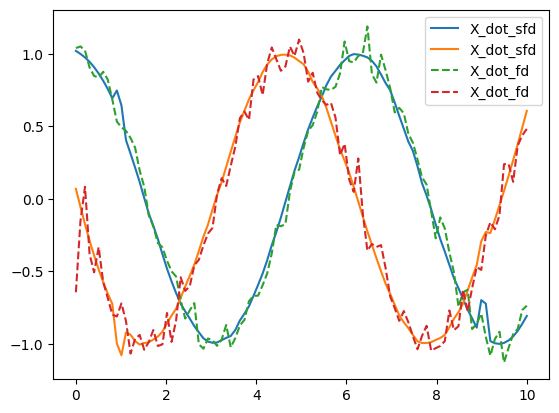

In [3]:
X_sfd = sfd._differentiate(X_noisy, t)
X_fd = fd._differentiate(X_noisy, t)

plt.plot(t, X_sfd,'-', label='X_dot_sfd')
plt.plot(t, X_fd,'--', label='X_dot_fd')
plt.legend()
plt.show()

next we break the method `_differentiate` into steps to understand it better. The first step is smoothing

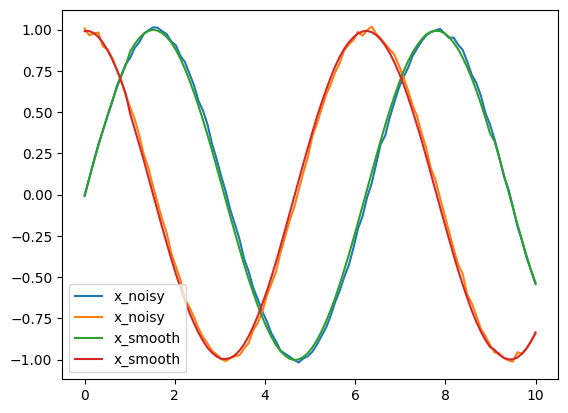

In [8]:
x_smooth = sfd.smoother(X_noisy, **sfd.smoother_kws)
plt.plot(t, X_noisy,'-', label='x_noisy')
plt.plot(t, x_smooth,'-', label='x_smooth')
plt.legend()
plt.show()

The next step is to call the method `_differentiate` from the class `FiniteDifference` which is enabled by the `super` function, so the line

```python
super(SmoothedFiniteDifference, self)._differentiate(x, t, x_dot)
```
implies that the method `_differentiate` from the class `FiniteDifference` 
